Assignment 2-1

We deal now with object oriented programming in Python. For this purpose perform the following steps:

1. Write a $Point$ class. A $Point$ class takes an $x$ and an $y$ coordinate as an argument.
2. Further this class shall have a setter method $setXY$ which takes an $x$ and $y$ coordinate and sets the attributes to the new provided values.
3. The class shall also have a getter method $getXY$ which returns the current $x$ and $y$ coordinates of the point.
4. Write a method distance which takes another $Point$ object and returns the euclidean distance between the provided point and the point itself.

Hint: Take *import math* to use $math.sqrt(somevalue)$ in order to compute the square root.

In [106]:
import math

class Point(object):
    
    def __init__(self, x, y):
        #java: this.x = x;
        self.x = x
        self.y = y
        
    def setXY(self, x, y):
        self.x = x
        self.y = y
        
    
    def getXY(self):
        return (self.x,self.y)
    
    
    def distance(self, otherpoint):
        d = (self.x-otherpoint.x)**2 + (self.y-otherpoint.y)**2
        return math.sqrt(d)
        

In [107]:
p1 = Point(5,9)
p2 = Point(3,3)

print(p1.getXY())
p1.setXY(10,10)
print(p1.getXY())

print(p1.distance(p2))

(5, 9)
(10, 10)
9.899494936611665


Assignment 2-2

In a next step the task is to create a class $Shape$. For this purpose perform the following steps

1. Create a class $Shape$ which takes a name and a color as parameters.
2. Define a method $area$ which just returns $0.0$.
3. Define a method $perimeter$ which just returns $0.0$.

Now create a class $Rectangle$ which inherits from $Shape$ and in which you implement the $area$ and $perimeter$
methods.

In [108]:
class Shape(object):
    
    def __init__(self, name, color):
        self.name = name
        self.color = color
        
    def area(self):
        return 0.0
    
    def perimeter(self):
        return 0.0
    

class Rectangle(Shape):
    def __init__(self, corner, width, height, color):
        #super(...) 'equivalent':
        Shape.__init__(self, "rectangle", color)
        self.corner = corner
        self.width = width
        self.height = height
    
    def perimeter(self):
        return self.width*2 + self.height*2
    
    def area(self):
        return self.width * self.height

In [109]:
r = Rectangle(Point(4,4),10,5,'pink')
print('Perimeter of rectangle r: ',r.perimeter())
print('Area of rectangle r: ', r.area())
    
# Felleisen et. al - How to design programs
# Felleisen et. al - How to design classes

Perimeter of rectangle r:  30
Area of rectangle r:  50


Assignment 2-3

For this assignment, we will use the file moviemetadata.csv, which contains entries from the IMDB movie database. The original source of the data is Kaggle: https://www.kaggle.com/deepmatrix/imdb-5000-movie-dataset}{https://www.kaggle.com/deepmatrix/imdb-5000-movie-dataset/. Please also consider to consult the documentation http://pandas.pydata.org/pandas-docs/stable/ if needed. Solve the following tasks:
1. Read the csv file as a DataFrame for further processing using $pandas.read\_csv()$.
2. Inspect the read csv file using $.shape$, $.columns$, $.info$ and $.describe()$.
3. Display the first five records of the data set using $.head(5)$ and the last five records using $.tail(5)$.
4. Select from the data set the first five records. Those records shall only contain the following columns: $movie\_title$, $duration$ and $num\_voted\_users$.
5. Select the first five movies containing the genre $'Action'$. Display only the columns $movie\_title$ and $genres$.
6. Sort the action movies by their $'imdb\_score'$ and display the names and scores the top-10 scored movies.
7. Group the movies by column 'director' and display the top-10 directors with the highest mean gross of their movies.
8. Optional: Delete all rows, which contain at least one missing value. Visualize parts of the data using $pandas.plotting.scatter\_matrix$ and $DataFrameGroupBy.hist$.

(5043, 28)
Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')
(3756, 28)


color
 Black and White    Axes(0.125,0.125;0.775x0.755)
Color               Axes(0.125,0.125;0.775x0.755)
Name: title_year, dtype: object

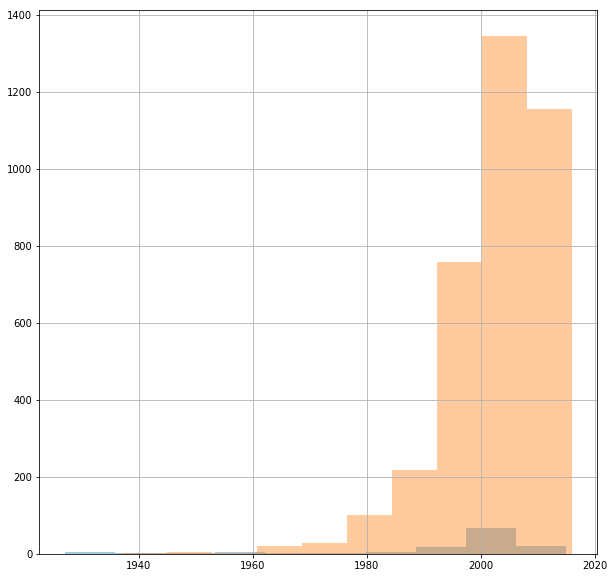

In [110]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
plt.style.use('default')
%matplotlib inline

# Read movie dataset
movie_data = pd.read_csv('moviemetadata.csv', 
                         delimiter=',',
                         header=0,
                         decimal='.')

# Get an overview
print(movie_data.shape)
print(movie_data.columns)
#print(movie_data.info)
#print(movie_data.describe())

# Show first/last 5 records
#print(movie_data.head(5))
#print(movie_data.tail(5))

# Indexing
#print(movie_data[['movie_title', 'duration', 'num_voted_users']].head(5))

# Filtering
#action_mask = movie_data['genres'].str.contains('Action')
#print(movie_data[action_mask][['movie_title', 'genres']].head(5))

# Sorting
#print(movie_data[action_mask].sort_values('imdb_score', ascending=False)[['movie_title', 'imdb_score']].head(10))

# Grouping
#print(movie_data.groupby(['director_name'])['gross'].mean().sort_values(ascending=False).head(10))

# Delete rows with NaNs
movie_data = movie_data.dropna(axis=0, how='any')
print(movie_data.shape)

# Visualization

#scatter_matrix(movie_data[['director_facebook_likes', 'budget', 'gross', 'imdb_score']], alpha=0.2, figsize=(10, 10), diagonal='kde')
movie_data.groupby('color')['title_year'].hist(alpha=0.4, figsize=(10, 10))

Assignment 2-4

In this assignment you will become familiar with the numpy library and some of its basic functionality. Please
also consider to consult the documentation https://docs.scipy.org/doc/numpy-dev/index.html if needed. Solve
the following tasks:

1. Create an numpy array of floats containing the numbers from $0$ to $4$.
2. Create the following matrix as a numpy matrix:
$M=\left(\begin{array}{ccc}
1 & 2 & 3 \\
4 & 5 & 6
\end{array}\right)$
3. Get the shape of the matrix $M$.
4. Check if the value $2$ is in $M$.
5. Given the array $a = np.array([0,1,2,3,4,5,6,7,8,9], np.float32)$. Reshape it to a $5 \times 2$ matrix.
6. Transpose the previously introduced matrix $M$.
7. Flatten matrix $M$.
8. Given the array $b = np.array([0,1,2,3], np.float32)$. Increase the dimensionality of $b$.
9. Create an $3 \times 3$ identity matrix.

In [111]:
import numpy as np

#create an np array with float as type
arr0 = np.array([1,2,3,4], np.float32)
arr0

#create a 2x3 matrix using np arrays
arr1 = np.array([[1,2,3],[4,5,6]], np.float32)
arr1[0,0]

#get shape of an array
arr1.shape

#getting type of array
arr1.dtype

#check if a particular value is in the array
[1,2,3] in arr1

#reshape an array e.g. 1x10 to an 5x2 array
arr2 = np.array(range(10), np.float32)
#print(arr2)
arr3 = arr2.reshape((5,2))
#print(arr3)

#fill matrix with specific value
arr4 = np.array(range(10))
arr4.fill(42)
print(arr4)

#transpose an array
arr5 = np.array([[1,2,3],[4,5,6]], np.float32)
arr6 = arr5.transpose()
#arr6 = arr5.T
print(arr5)
print(arr6)

#flatten an array...
print(arr6.flatten())

#increasing dimensionality of an array
arr7 = np.array([1,2,3], np.float32)
print(arr7)
print(arr7[:,np.newaxis])

#array of ones and zeros
print("array of ones and zeros")
print(np.ones((2,3), np.float32))
print(np.zeros((2,3), np.float32))

#getting an identity matrix
print(np.identity(3, np.float32))

[42 42 42 42 42 42 42 42 42 42]
[[ 1.  2.  3.]
 [ 4.  5.  6.]]
[[ 1.  4.]
 [ 2.  5.]
 [ 3.  6.]]
[ 1.  4.  2.  5.  3.  6.]
[ 1.  2.  3.]
[[ 1.]
 [ 2.]
 [ 3.]]
array of ones and zeros
[[ 1.  1.  1.]
 [ 1.  1.  1.]]
[[ 0.  0.  0.]
 [ 0.  0.  0.]]
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


Assignment 2-5

1. Given the following two numpy arrays:

$$a = np.array([1,2,3], np.float32),$$
$$b = np.array([4,5,6], np.float32)$$

Compute the dot product of $a$ and $b$.

2. Given the following matrix M:
$$M=\left(\begin{array}{ccc}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{array}\right)$$
Compute the determinant of $M$ by using the $linalg$ package of the numpy library.
3. Compute the eigenvalues and eigenvectors of $M$.
4. Compute the inverse of $M$.
5. Given the numpy array $c = np.array([1,4,3,8,3,2,3], np.float32)$, compute the mean of $c$.
6. Using $c$, compute the median.
7. Given the following matrix
$$C=\left(\begin{array}{cc}
1 & 1 \\
3 & 4 \\
\end{array}\right)$$
Compute the covariance of $C$.

In [112]:
import numpy as np
arr8 = np.array([1,2,3], np.float32)
arr9 = np.array([4,5,6], np.float32)
print(np.dot(arr8,arr9))

arr10 = np.array([[1,2,3],[4,5,6],[7,8,9]], np.float32)
print(np.linalg.det(arr10))

print(np.cross(arr8,arr9))

eigenvals, eigenvecs = np.linalg.eig(arr10)
print(eigenvals)
print("------")
print(eigenvecs)

arr10 = arr10 + 1e-08*np.eye(arr10.shape[0], arr10.shape[1])
print(np.linalg.det(arr10))
print(np.linalg.inv(arr10))

U, s, v = np.linalg.svd(arr10)
print("----SVD----")
print("U: ",U)
print("s: ",s)
print("v: ",v)

32.0
0.0
[-3.  6. -3.]
[  1.61168442e+01  -1.11684394e+00  -1.30367773e-15]
------
[[-0.23197068 -0.78583026  0.40824831]
 [-0.52532208 -0.08675134 -0.81649661]
 [-0.81867349  0.61232758  0.40824831]]
-1.80000001835e-07
[[ 16666665.71896983 -33333332.88238412  16666666.66341429]
 [-33333332.77127301  66666665.43143494 -33333332.66016192]
 [ 16666666.88563651 -33333332.54905081  16666666.16341429]]
----SVD----
U:  [[-0.21483724  0.88723069  0.40824829]
 [-0.52058739  0.24964395 -0.81649658]
 [-0.82633754 -0.38794278  0.40824829]]
s:  [  1.68481034e+01   1.06836951e+00   1.00000002e-08]
v:  [[-0.47967118 -0.57236779 -0.66506441]
 [-0.77669099 -0.07568647  0.62531805]
 [ 0.40824829 -0.81649658  0.40824829]]


In [113]:
#compute mean
arr11 = np.array([1,4,3,8,9,2,3],float)
print("mean: ",np.mean(arr11))
print("median: ",np.median(arr11))

arr12 = np.array([[1,1],[3,4]],float)
print('cov: ',np.cov(arr12))

mean:  4.28571428571
median:  3.0
cov:  [[ 0.   0. ]
 [ 0.   0.5]]


In this exercise, we will implement a k-means clustering algorithm.

1. Load the dataset $blobs.csv$ and visualize it using $matplotlib.pyplot.scatter$.
2. Implement a function $kmeans(data,k)$.
3. Optional: Visualize intermediate results after each iteration.
4. Apply your method to the blobs dataset using different values for $k$ and plot the results.
5. Load the dataset $mouse.csv$ and visualize it. Apply your method to the mouse dataset as well and discuss the differences.

(100, 2)


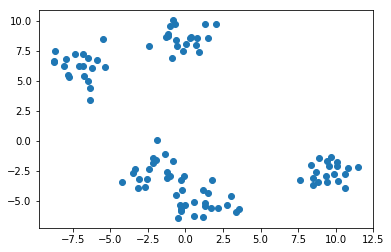

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('default')
%matplotlib inline

# pd.read_csv('blobs.csv', header=None).plot.scatter(0, 1)  # pandas built-in
blobs_data = pd.read_csv('blobs.csv', header=None).as_matrix()
print(blobs_data.shape)
plt.scatter(blobs_data[:,0], blobs_data[:,1])

In [115]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from itertools import cycle

def visualize_clusters(figure_number, X, cluster_labels, centroids):
    
    plt.figure(figure_number)
    plt.title('Iteration ' + str(figure_number))
    plt.scatter(X[:, 0], X[:, 1], c=cluster_labels)
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], color='r', marker='+', s=80)

def kmeans(X, k):

    # Initialization
    
    tol = 1e-05
    max_iter = 10

    sse = np.float('inf')
    it = 0

    initial_centroids = np.random.choice(X.shape[0], size=k, replace=False)
    centroids = X[initial_centroids]
    cluster_labels = None

    while it < max_iter:

        # Compute distance between each (data point, centroid)-pair
        # Distance matrix of shape n_points x n_centroids
        distances = cdist(X, centroids, metric='euclidean')

        # Assign each point to its closest centroid
        # Label vector indicating the cluster index for each point
        cluster_labels = np.argmin(distances, axis=1)
        
        # Check convergence
        min_distances = distances[range(distances.shape[0]), cluster_labels]
        new_sse = np.sum(min_distances**2)
        if sse - new_sse < tol:
            break
        else:
            sse = new_sse

        # Re-compute centroids
        centroids = np.array([X[cluster_labels == cluster].mean(axis=0) for cluster in range(k)])

        # Visualize itermediate results
        visualize_clusters(it, X, cluster_labels, centroids)
        
        # Increment iteration counter
        it += 1

    # Visualize and return the final clustering
    visualize_clusters(it, X, cluster_labels, centroids)
    return cluster_labels

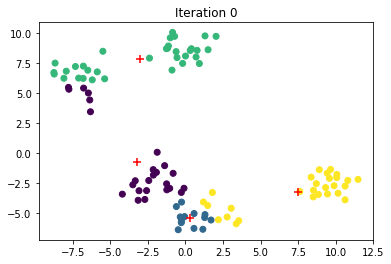

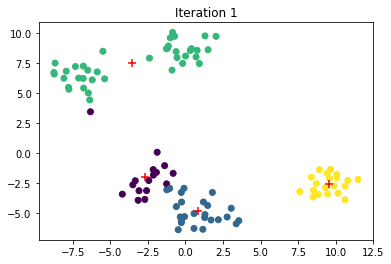

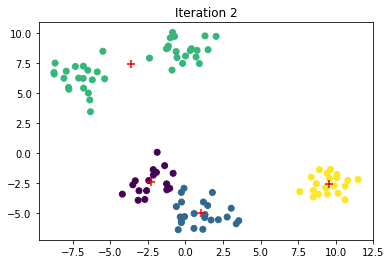

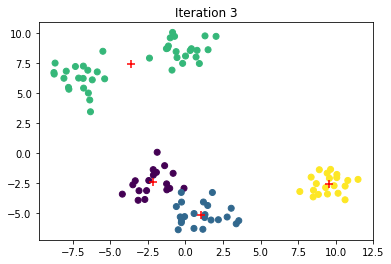

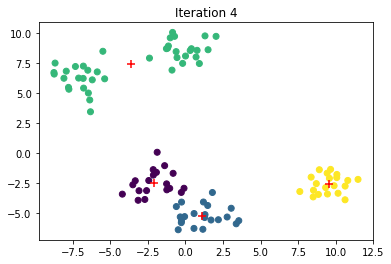

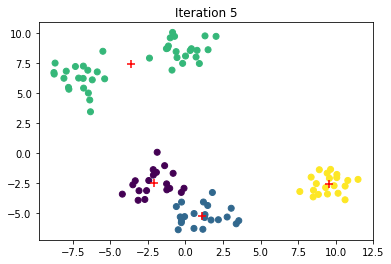

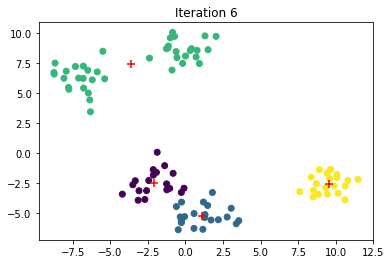

In [116]:
cluster_labels = kmeans(blobs_data, 4)

(500, 2)


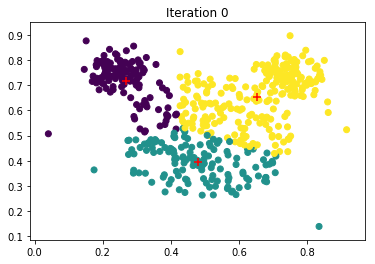

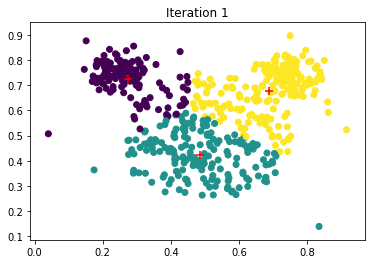

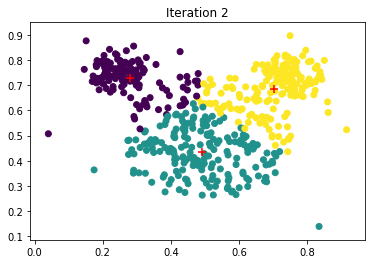

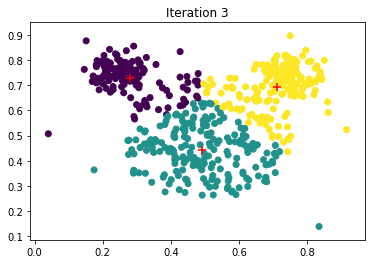

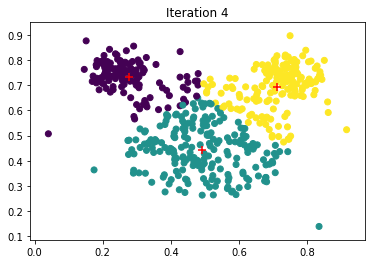

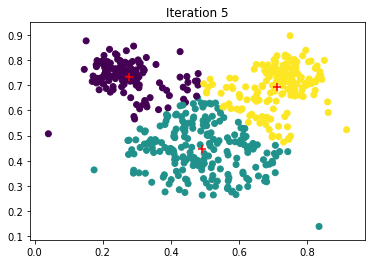

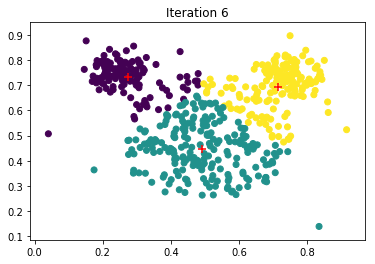

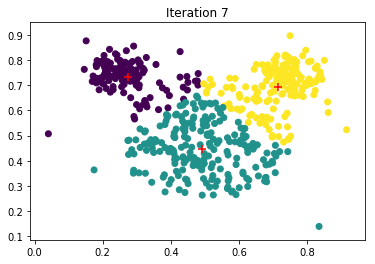

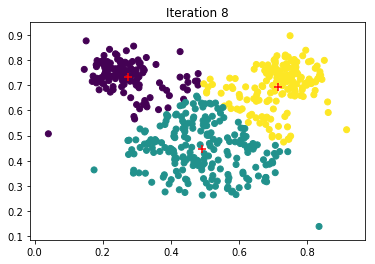

In [117]:
mouse_data = pd.read_csv('mouse.csv', header=None).as_matrix()
print(mouse_data.shape)
cluster_labels = kmeans(mouse_data, 3)

In [118]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!
